[112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112
 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112
 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112
 112 112 112 112 112 112 112 112 112 112 113 112 112 112 112 112 112 112
 112 113 113 113 113 114 114 115 116 113 112 113 114 112 112 114 114 112
 112 126 174   1   1 177   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   1   0   0   0   0   0   1   1   0   0   0   0   0 175 132 110 114 114
 114 114 114 114 114 114 114 113 113 113 113 113 114 115 112 112 112 112
 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112
 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112
 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112 112
 112 112 112 112 112 112 112 112 112 112 112 112 11

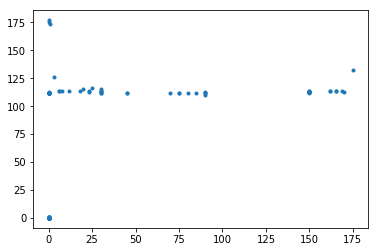

In [77]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from math import *

#Le janela da imagem (img_b) e referencia (img)
img = cv2.imread('5x5_o.jpg')
img_b = cv2.imread('5x5_o2.jpg')

#Converte pra HSV
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_b = cv2.cvtColor(img_b, cv2.COLOR_BGR2HSV)

#print hue da primeira linha de pixels
print(img[0,:,0])
print(img_b[0,:,0])

#plot hue por index de pixel pra primeira linha de pixels
# plt.plot(np.arange(0,250,1),img[0,:,0])
# plt.show()

#plot do hue de uma imagem pelo hue da outra
plt.plot(img_b[0,:,0],img[0,:,0], '.')
plt.show()

#conterte de volta pra RGB
# img = cv2.cvtColor(img, cv2.COLOR_HSV2BGR)

#mostrar a imagem em uma janela que eu posso fechar quando quiser
# cv2.imshow('little o',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [90]:
#CLUSTERER

#quantidade de informação sendo comparada, lembrando que a janela tem que ter o mesmo tamanho da imagem de referencia
win_size = len(img[0,:,0])

#quao longes os pontos desse cluster podem estar, 100 sendo o minimo e 0 sendo o maximo
acur = 10

list_vect = []

for index in range(0,len(img[0,:,0])-1):
    exec('list_vect.append(' + str(img[0,index,0]) + ' + ' + str(img_b[0,index,0]) + 'j)')

for vect1_index in range(0,len(list_vect)-1):
    for vect2_index in range(0,len(list_vect)-1):
        if (vect1_index != vect2_index) and (abs(list_vect[vect1_index]) > (abs(list_vect[vect2_index]) - (win_size*(acur/100)))) and (abs(list_vect[vect1_index]) < (abs(list_vect[vect2_index]) + (win_size*(acur/100)))) and (np.angle(list_vect[vect1_index]) > (np.angle(list_vect[vect2_index]) - (2*pi*(acur/100)))) and (np.angle(list_vect[vect1_index]) < (np.angle(list_vect[vect2_index]) + (2*pi*(acur/100)))):
            try:
                exec('clust_vect_index_' + str(vect1_index) + '.append('+ list_vect[vect2_index] +')')
#             exec('cluster_' + str(vect1_index) + ' = ')
#     if (img_b[0,index,0] < (img[0,index,0] + (100/acur))) and (img_b[0,index,0] > (img[0,index,0] - (100/acur))):
#         print(index)
#         print(sqrt((img_b[0,index,0]**2) + (img[0,index,0]**2)))

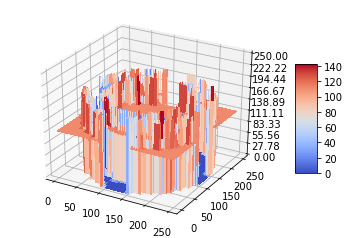

In [88]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(0, 250, 1)
Y = np.arange(0, 250, 1)
X, Y = np.meshgrid(X, Y)
R = img[Y,X,0]
Z = R

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(0, 250)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()